# DSCI 100 Project: Individual planning stage

<u><b>By Angel Chen (71703029) of Group 4 from DSCI 100 008</b></u>

GitHub repository: https://github.com/achen45-png/toy_ds_project

In [1]:
# Install some R packages.
library(repr)
library(tidyverse)
library(lubridate)
options(scipen = 999, repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data description

### players.csv
`players.csv` is loaded as `og_players`, then tidied as `players`.

In [2]:
# players.csv data.
og_players <- read_csv("https://raw.githubusercontent.com/achen45-png/toy_ds_project/refs/heads/main/data/players.csv",
                       show_col_types = FALSE)
og_players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


<br>

`experience` and `gender` are categorical variables with a limited selection of values, so factor is better suited than character. Age is usually represented as a positive integer, so `Age` is changed to integer.

In [3]:
# Wrangling to tidy the data.
players <- og_players |>
    mutate(
        experience = as_factor(experience), # Correcting the data types.
        gender = as_factor(gender),
        Age = as.integer(Age)
    )
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


<br>

`players` data comprises 7 variables (Table 1) and 196 observations.

|Variable|Data type|Explanation|
|--------|--------|--------|
|`experience`|~~character~~ factor|Participant's self-identified Minecraft experience level<br>(options include Beginner, Amateur, Regular, Veteran, Pro)|
|`subscribe`|logical|Participant's subscription to game-related newsletter<br>(`TRUE` if subscribed, `FALSE` otherwise)|
|`hashedEmail`|character|64-digit hash encoding participant's email, a unique combination<br>of numbers and letters for each participant|
|`played_hours`|double|Total hours of Minecraft played on the PLAICraft.ai browser|
|`name`|character|Player's submitted name|
|`gender`|~~character~~ factor|Player's self-identified gender (options include Male, Female,<br>Non-binary, Agender, Two-Spirited, Other, and Prefer not to say)|
|`Age`|~~double~~ integer|Player's submitted age|

<center><b><i>Table 1</i></b> Variables of <code>players</code>. Strikethroughs represent data types from <code>players.csv</code> that were changed in <code>players</code> data for tidying.</center>

<br>
<br>

|Variable|Minimum|Maximum|Median|Mean|
|--------|--------|--------|--------|--------|
|`played_hours`|0|223.1|0.1|5.85|
|`Age`|9|58|19|21.14|

<center><b><i>Table 2</i></b> Summary of <code>players</code> quantitative variables. (The code used to obtain the values is at the end of the notebook.)</center>
<br>

Each observation in `players` data represents a unique participant who has *registered* to play Minecraft on PLAICraft.ai, not who has actually played. There are 196 registered players, half of which have `played_hours` less than 0.1 hours (Table 2).

Concerns:
* Participants can lie about their `Age`, `gender`, `name`, or `experience`.
* `experience` is an ordinal categorical variable, but the order isn't described by researchers. Is “Pro” more experienced than “Veteran”? Furthermore, experience level is self-reported, not standardized. Is it really comparable between players? It may be more accurate to call this variable "confidence".
* What are the contents of the game-related newsletter in `subscribe`? Decision to subscribe can be affected by newsletter content (e.g. Minecraft-only, other video games), not solely by participant characteristics. Is subscription status self-reported by participants or tracked by researchers?

### sessions.csv

`sessions.csv` is loaded as `og_sessions`, then tidied as `sessions`.

In [4]:
# sessions.csv data.
og_sessions <- read_csv("https://raw.githubusercontent.com/achen45-png/toy_ds_project/refs/heads/main/data/sessions.csv",
                        show_col_types = FALSE)
og_sessions

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1719770000000,1719770000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1718670000000,1718670000000
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1721930000000,1721930000000
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1722180000000,1722180000000
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1721890000000,1721890000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1716170000000,1716170000000


<br>

`start_time` and `end_time` are datetime data and are changed to datetime from character to reflect as such.

In [5]:
# Wrangling to tidy the data.
sessions <- og_sessions |>
    mutate(
        start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M", tz = "GMT"), # Optimizing the data types.
        end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M", tz = "GMT")
    )
sessions
# IF ANY OF THE <dttm> VARIABLES RETURN NA, PLEASE RESTART THE KERNEL AND RERUN ALL CELLS.

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1719770000000,1719770000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1718670000000,1718670000000
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1721930000000,1721930000000
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28 15:36:00,2024-07-28 15:57:00,1722180000000,1722180000000
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25 06:15:00,2024-07-25 06:22:00,1721890000000,1721890000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20 02:26:00,2024-05-20 02:45:00,1716170000000,1716170000000


<br>

`sessions` data comprises 5 variables (Table 3) and 1535 observations.

|Variable|Data type|Explanation|
|--------|--------|--------|
|`hashedEmail`|character|64-digit hash encoding participant's email, a unique combination<br>of numbers and letters for each participant|
|`start_time`|~~double~~ datetime|Date and 24-hour time in GMT at which player began game session|
|`end_time`|~~double~~ datetime|Date and 24-hour time in GMT at which player ended game session|
|`original_start_time`|double|Unix timestamp in GMT at which player began game session|
|`original_end_time`|double|Unix timestamp in GMT at which player ended game session|

<center><b><i>Table 3</i></b> Variables of <code>sessions</code>. Strikethroughs represent data types from <code>sessions.csv</code> that were changed in <code>sessions</code> data for tidying. "Game session" refers to a time interval of playing Minecraft on the PLAICraft.ai browser.</center>

<br>
<br>

|Variable|Minimum|Maximum|Median|Mean|
|--------|--------|--------|--------|--------|
|`start_time`|2024-04-06 09:27|2024-09-26 06:09|2024-06-24 02:51|2024-06-24 03:54|
|`end_time`|2024-04-06 09:31|2024-09-26 07:39|2024-06-23 22:04|2024-06-24 02:26|

<center><b><i>Table 4</i></b> Summary of <code>sessions</code> datetime variables. (The code used to obtain the values is at the end of the notebook.)</center>
<br>

The `sessions` data was collected from April 6, 2024 to September 26, 2024 GMT (Table 4). We assume the `players` data is from the same time span. Each observation in `sessions` data represents one game session, i.e. one instance of a player’s uninterrupted Minecraft session on PLAICraft.ai. The unique `hashedEmail` identifies players. Players who have more than 1 game session would have more than 1 observation in the dataset.

In [6]:
options(repr.matrix.max.rows = 4)
sessions_unique_hash <- sessions |>
    group_by(hashedEmail) |>
    summarize(num_sessions = n()) |>
    arrange(desc(num_sessions))
sessions_unique_hash

hashedEmail,num_sessions
<chr>,<int>
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219
⋮,⋮
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1


<br>

There are 125 unique `hashedEmail` values (i.e. players) that make up 1535 observations in `sessions`, with the maximum number of sessions (observations) from one player being 310.

Concerns:
* Players with multiple game sessions (i.e. observations in `sessions`) could skew data (explained more under Graph 1).
* `original_start_time` and `original_end_time` are almost always equal and don't provide useful information because the last 7 digits are omitted. They're made redundant by `start_time` and `end_time` which have more precise time values (minutes). See below for reference.

In [7]:
head(sessions, n = 1)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1719770000000,1719770000000


## Research question
### Which time windows are most likely to have large numbers of simultaneous players? Specifically, can age and experience predict the time of day at which a player would start a session? (Both `sessions` and `players` data required.)

## Initial visualization

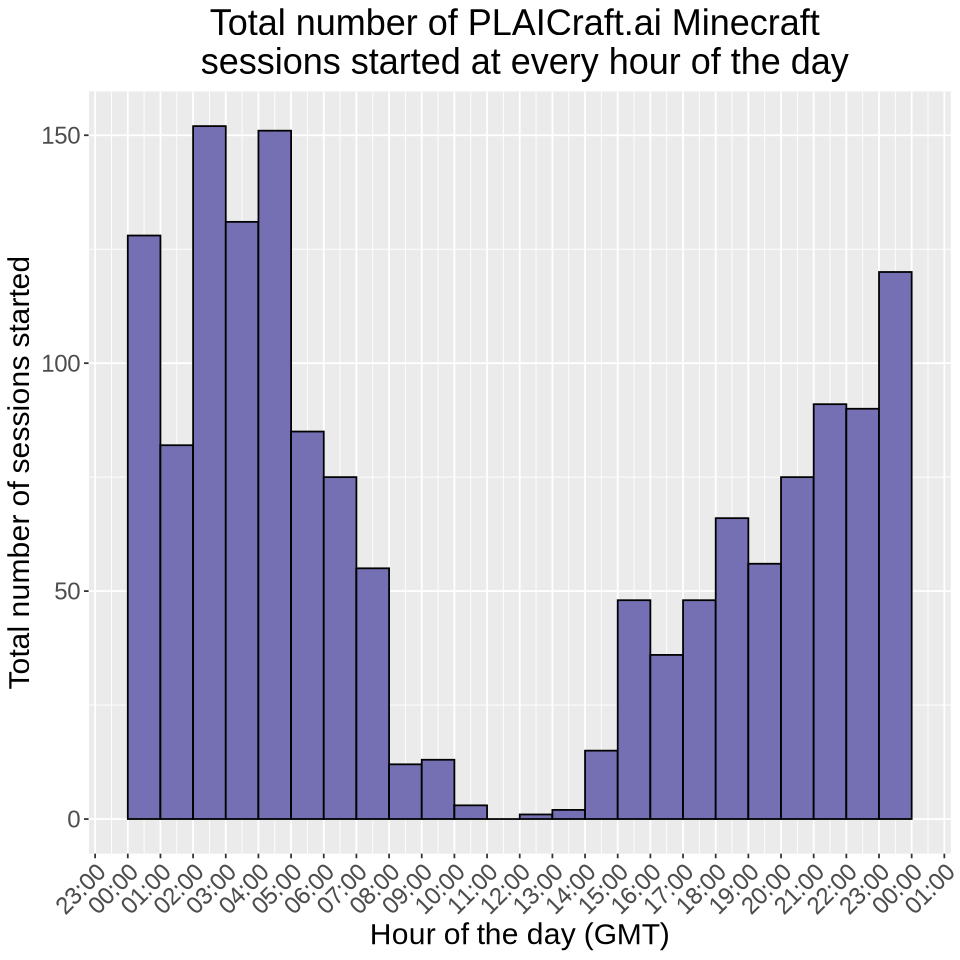

In [21]:
# Graph 1
options(repr.plot.width = 8, repr.plot.height = 8)
sessions_start <- sessions |>
    mutate(start_time_only = strftime(start_time, "%H:%M:%S")) |> # Extract time from start_time without date, attach as new column.
    mutate(start_time_only = as.POSIXct(start_time_only, format = "%H:%M:%S", tz = "GMT")) |> # Change type from chr to POSIXct dttm.
    ggplot(aes(start_time_only)) + # Now, the data can be plotted.
        geom_histogram(colour = "black", binwidth = 3600,
                       boundary = 0, fill = "#7570b3ff") +
        scale_x_datetime(date_break = "1 hour", date_label = "%H:%M") +
        labs(x = "Hour of the day (GMT)", y = "Total number of sessions started",
             title = "Total number of PLAICraft.ai Minecraft \n sessions started at every hour of the day") +
        theme(text = element_text(size = 18), plot.title = element_text(hjust = 0.5),
              axis.text.x = element_text(angle = 45, hjust = 1))
sessions_start

***Graph 1*** From `sessions` data, total counts of game session starts (`start_time`) at each hour of day in GMT, disregarding date (year-month-day) data.

<br>

Graph 1 serves to find the time window in a day with high numbers of simultaneous players. The main problem however is that certain players have more observations (i.e. more game sessions, view `sessions_unique_hash` above). Players with high session counts may start game sessions around the same hours everyday, skewing counts towards those hours. Graph 2 illustrates this problem.

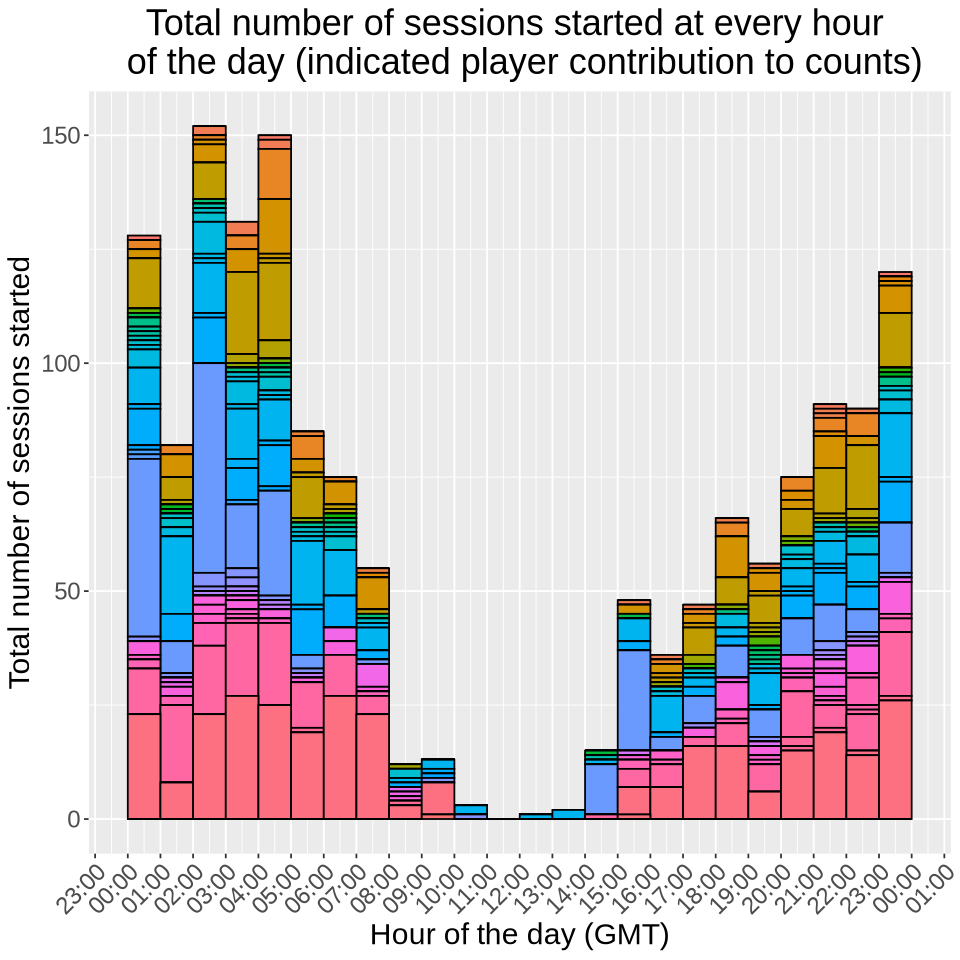

In [22]:
# Graph 2
sessions_start2 <- sessions |>
    na.omit() |>
    mutate(start_time_only = strftime(start_time, "%H:%M:%S")) |>
    mutate(start_time_only = as.POSIXct(start_time_only, format = "%H:%M:%S", tz = "GMT")) |>
    ggplot(aes(start_time_only, fill = hashedEmail)) +
        geom_histogram(colour = "black", binwidth = 3600, boundary = 0) +
        scale_x_datetime(date_break = "1 hour", date_label = "%H:%M") +
        labs(x = "Hour of the day (GMT)", y = "Total number of sessions started",
             title = "Total number of sessions started at every hour \n of the day (indicated player contribution to counts)") +
        theme(text = element_text(size = 18), plot.title = element_text(hjust = 0.5),
              axis.text.x = element_text(angle = 45, hjust = 1), legend.position = "none") # Legend is omitted for brevity.
sessions_start2

***Graph 2*** It is Graph 1 filled according to `hashedEmail` from `sessions`. Do not trust similar colours across different bins to be the same colour. There are 125 unique players in this graph; the colour palette fails to represent them effectively. Focus on looking at individual bins. Each “fill” within a bin represents session start counts from a unique player. <u>This graph isn’t meant to be “good” visualization; it serves to demonstrate players’ unequal data contribution.</u>

<br>

To solve this problem, I’d scale session counts to make each player’s data contribution equal. For example, for a player with 310 sessions, each session would count as 1/310 of a count, making the player’s cumulative contribution 1 count. I’d need to make a new column in `sessions` denoting scaled counts and plot a bar graph (scaled counts vs. hours of day) with a continuous x-axis.

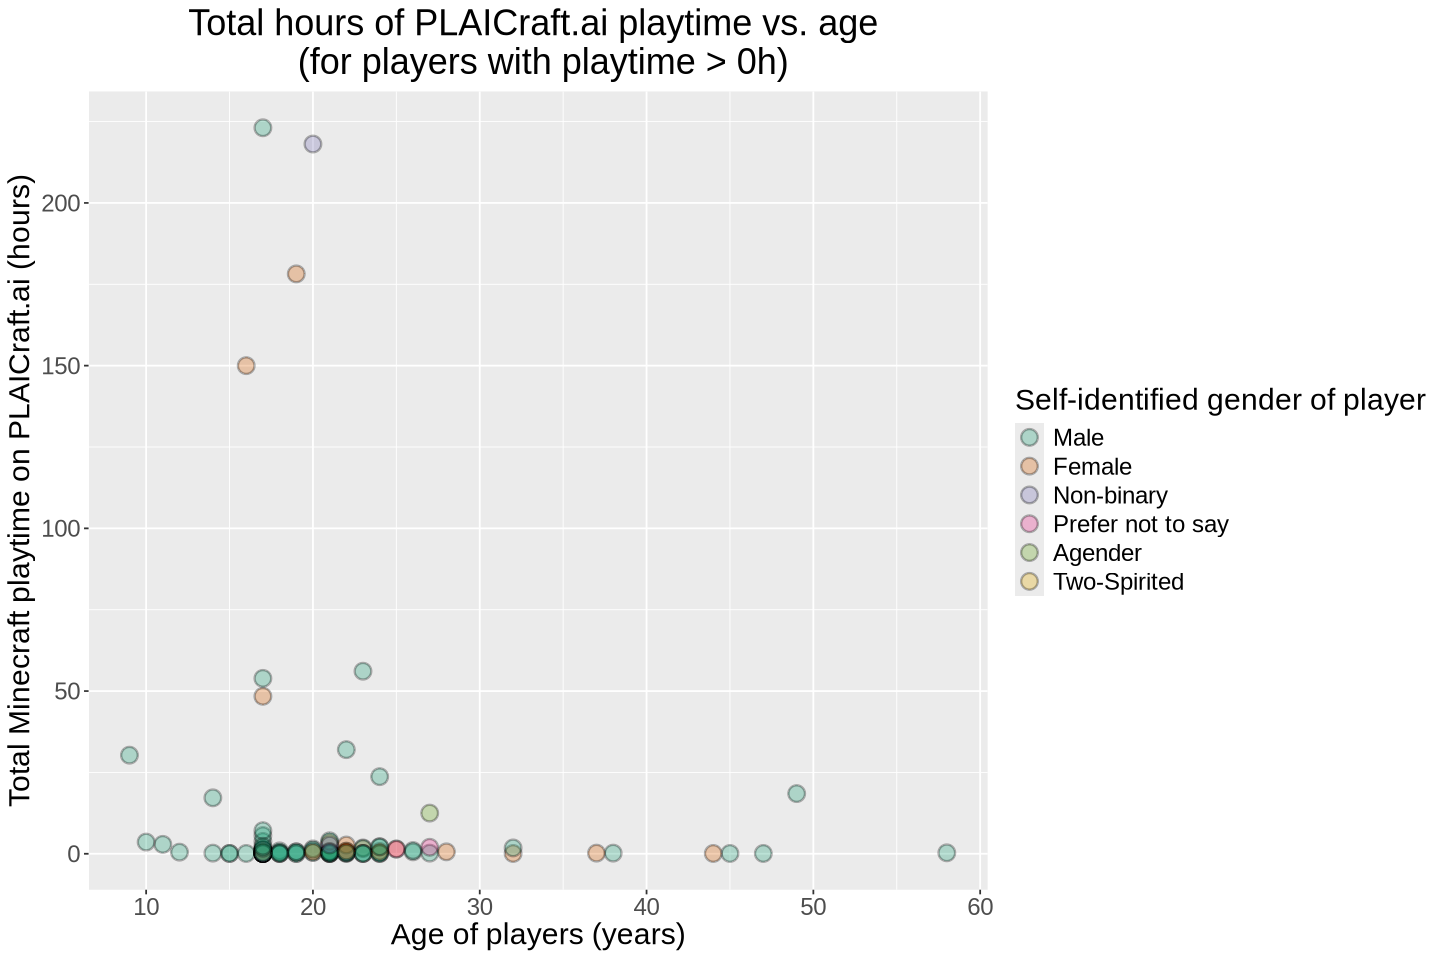

In [28]:
# Graph 3
options(repr.plot.width = 12, repr.plot.height = 8)
hour_v_age <- players |>
    na.omit() |> # Removing 2 NA's (2 observations).
    filter(played_hours != 0) |> # Removing participants with 0h playtime.
    ggplot(aes(x = Age, y = played_hours, fill = gender)) +
        geom_point(alpha = 0.3, size = 4, stroke = 1, shape = 21) +
        labs(x = "Age of players (years)", y = "Total Minecraft playtime on PLAICraft.ai (hours)", fill = "Self-identified gender of player",
             title = "Total hours of PLAICraft.ai playtime vs. age \n (for players with playtime > 0h)") +
        theme(text = element_text(size = 18), plot.title = element_text(hjust = 0.5)) +
        scale_fill_brewer(palette = "Dark2") +
        scale_colour_brewer(palette = "Dark2")
hour_v_age

***Graph 3*** From `players` data, `played_hours` vs. `Age`, coloured by `gender`. Only participants with `played_hours` > 0 hours are included.

<br>
 
Participants who have played at least once (`played_hours` values > 0) would have their game session recorded in `sessions` data. Graph 3 shows that most players contributing to `sessions` data are male and aged teens to 20s (though gender is irrelevant to my question).

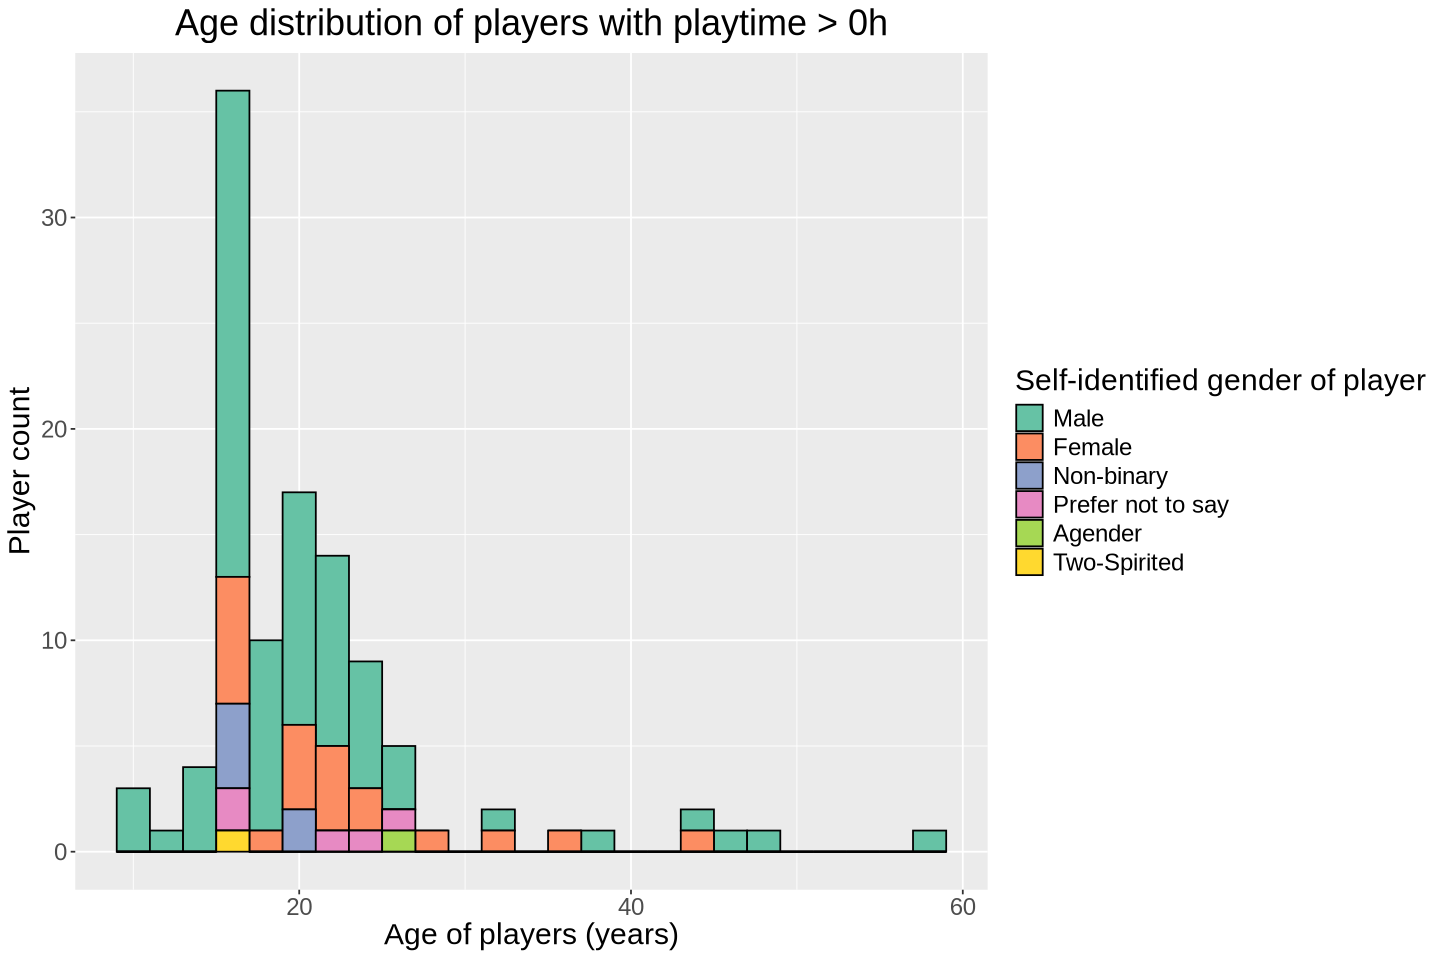

In [32]:
# Graph 4
options(repr.plot.width = 12, repr.plot.height = 8)
player_age <- players |>
    na.omit() |>
    filter(played_hours > 0) |>
    ggplot(aes(Age, fill = gender)) +
        geom_histogram(binwidth = 2, colour = "black") +
        labs(x = "Age of players (years)", y = "Player count", fill = "Self-identified gender of player",
             title = "Age distribution of players with playtime > 0h") +
        theme(text = element_text(size = 18), plot.title = element_text(hjust = 0.5)) +
        scale_fill_brewer(palette = "Set2")
player_age

***Graph 4*** From `players` data, distribution and frequency (counts) of players' `Age`. Only participants with `played_hours` > 0 hours are included.

<br>

Graph 4 shows that the most common ages of players contributing to `sessions` data are 16 to 17. Any further visualization relevant to my research question requires wrangling beyond tidying data (described in the following section).

## Predictive analysis and plan

**Predictor variables:** `experience` and `Age` from `players` data.

**Response variable:** Time of game session start in a day in hour:minute format, derived from `start_time` of `sessions` data.

Method:
1. Create column `start_hour_min` to isolate hour:minute data from `start_time`.
2. Calculate median of `start_hour_min` for players (identified by `hashedEmail`) with >1 observations in `sessions`. *Assumption: Players’ session start times have normal distribution.* <b>See below for notes. ***</b>
3. Remove participants with `played_hours` equal to 0 in `players`. Merge with `sessions`.
4. Visualize `Age` vs. `start_hour_min` and `experience` (dummy variables) vs. `start_hour_min` to check for linearity. Time of a day is cyclical, so I don’t expect linear relationships. If linear, use linear regression (and ignore subsequent steps).
5. Otherwise, use $k$-NN regression (response is numerical). *Assumption: Similar data points cluster. Points that are less distanced apart are more related.*
6. Split the merged `players` / `sessions` data into 80% training and 20% testing.
7. Conduct 10-fold cross-validation with training set to find best $k$ with minimum RMSPE.
8. Use best $k$ to build $k$-NN regression model with training set.
9. Assess model via testing set.

Limitation: There’s no regard for what day of the week `start_hour_min` comes from, which is expected to vary depending on weekday or weekend.

<b>*** Notes:</b> My method is unsophisticated. Due to unequal data contribution from players in `sessions`, I’d need to scale the observations for each unique player’s data to weigh equally (rather than skewing predictions towards players with more observations), on top of the scaling used in predictive analysis like in $k$-NN models where nearest neighbours hold greatest predictive weight. Imputation is near impossible because half of the players in `sessions` only have 1 observation while the maximum observations from one player is 310 (see `sessions_unique_hash` below). Whatever data analysis this requires isn’t within this course, so I use medians (over means for the reduced effect from outliers).

In [15]:
# For convenience. As a reminder, sessions_unique_hash groups the sessions dataset by hashedEmail
# and then counts the number of observations of each unique hash to make num_sessions.
summary(sessions_unique_hash)
options(repr.matrix.max.rows = 10)
sessions_unique_hash

 hashedEmail         num_sessions   
 Length:125         Min.   :  1.00  
 Class :character   1st Qu.:  1.00  
 Mode  :character   Median :  1.00  
                    Mean   : 12.28  
                    3rd Qu.:  2.00  
                    Max.   :310.00  

hashedEmail,num_sessions
<chr>,<int>
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,147
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,130
⋮,⋮
f7875ae87a61632030d5c4029ee8cf081be7047b2b4a9c04ab5a706f59786197,1
fc0224c81384770e93ca717f32713960144bf0b52ff67639433a5c06a653a882,1
fcab03c6d3079521e7f9665caed0f31fe3dae6b5ccb86e6cb58747a43aa8789f,1


## Extra code (appendix)

In [12]:
# Here are the code omitted from earlier explanations to ease readability.
# Code that yielded Table 2.
players_summary <- players |>
    summarize(
        min_played_hours = min(played_hours, na.rm = TRUE),
        max_played_hours = max(played_hours, na.rm = TRUE),
        mean_played_hours = mean(played_hours, na.rm = TRUE),
        median_played_hours = median(played_hours, na.rm = TRUE),
        min_age = min(Age, na.rm = TRUE),
        max_age = max(Age, na.rm = TRUE),
        mean_age = mean(Age, na.rm = TRUE),
        median_age = median(Age, na.rm = TRUE),
    )
players_summary
# summary(players) also works.

# Code that yielded Table 4.
sessions_summary <- sessions |>
    summarize(
        min_start_time = min(start_time, na.rm = TRUE),
        max_start_time = max(start_time, na.rm = TRUE),
        mean_start_time = mean(start_time, na.rm = TRUE),
        median_start_time = median(start_time, na.rm = TRUE),
        min_end_time = min(end_time, na.rm = TRUE),
        max_end_time = max(end_time, na.rm = TRUE),
        mean_end_time = mean(end_time, na.rm = TRUE),
        median_end_time = median(end_time, na.rm = TRUE),
    )
sessions_summary
# summary(sessions) also works.

min_played_hours,max_played_hours,mean_played_hours,median_played_hours,min_age,max_age,mean_age,median_age
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
0,223.1,5.845918,0.1,9,58,21.13918,19


min_start_time,max_start_time,mean_start_time,median_start_time,min_end_time,max_end_time,mean_end_time,median_end_time
<dttm>,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>
2024-04-06 09:27:00,2024-09-26 06:09:00,2024-06-24 03:54:03,2024-06-24 02:51:00,2024-04-06 09:31:00,2024-09-26 07:39:00,2024-06-24 02:26:18,2024-06-23 22:04:00
